# [Lab Session 3](fourier.ipynb)


In [173]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


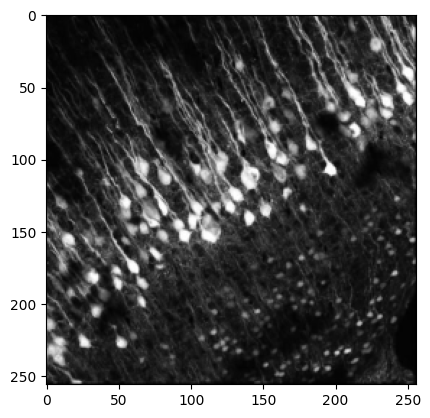

In [174]:
cell_img = plt.imread('data/cells.png')
resized_img= resize(cell_img, (256,256))
plt.imshow(resized_img, cmap='gray')


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [175]:
cell_ft = np.fft.fft2(resized_img)
print(cell_ft.dtype)


complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [176]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)


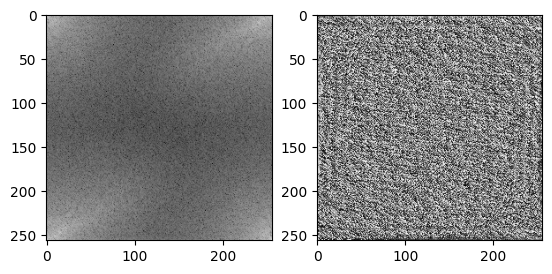

In [177]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


In [178]:
shift_cell_ft = np.fft.fftshift(cell_ft)
amplitude_shift = np.abs(shift_cell_ft)
phase_shift = np.angle(shift_cell_ft)

cell_phase_shift = np.angle(shift_cell_ft)


**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


Text(0.5, 1.0, 'Restored Image from Fourier Transform')

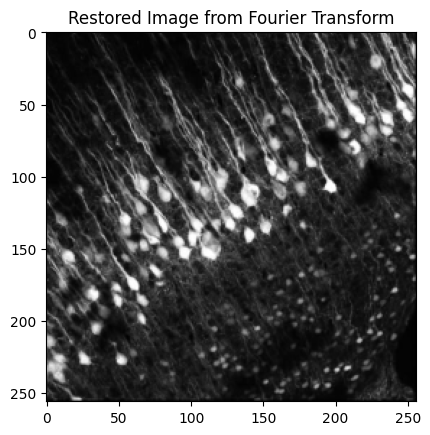

In [179]:
unshifted = np.fft.ifftshift(shift_cell_ft)
restored = np.fft.ifft2(unshifted)
restored_real = restored.real

plt.figure()
plt.imshow(restored_real, cmap='gray')
plt.title('Restored Image from Fourier Transform')  

---


**[Task 2 (a).]()** Load the brain MR image.


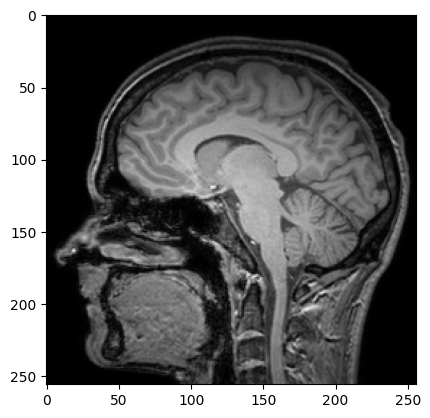

In [180]:
brain_mri = plt.imread("data/brain_mri.png")

brain_resized = resize(brain_mri, (256,256))
plt.imshow(brain_resized, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


Text(0.5, 1.0, 'Log Amplitude Spectrum of Brain MRI')

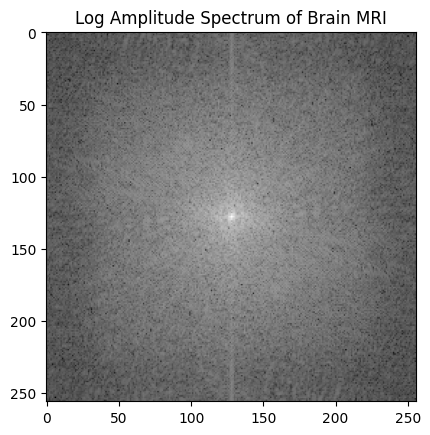

In [181]:
brain_ft = np.fft.fft2(brain_resized)
brain_ft_shifted = np.fft.fftshift(brain_ft)

brain_amp_shift = np.abs(brain_ft_shifted)
brain_phase_shift = np.angle(brain_ft_shifted)

plt.imshow(np.log(brain_amp_shift), cmap='gray')
plt.title('Log Amplitude Spectrum of Brain MRI')

Text(0.5, 1.0, 'Phase Spectrum of Brain MRI')

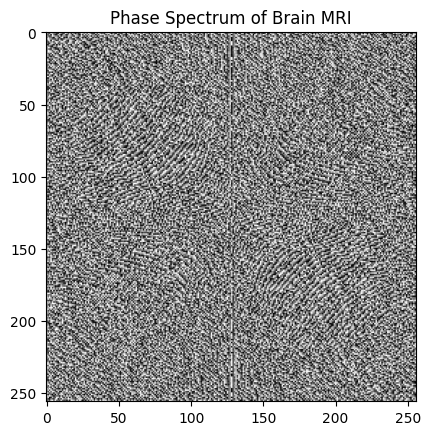

In [182]:
plt.imshow(brain_phase_shift, cmap='gray')
plt.title('Phase Spectrum of Brain MRI')

In [183]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


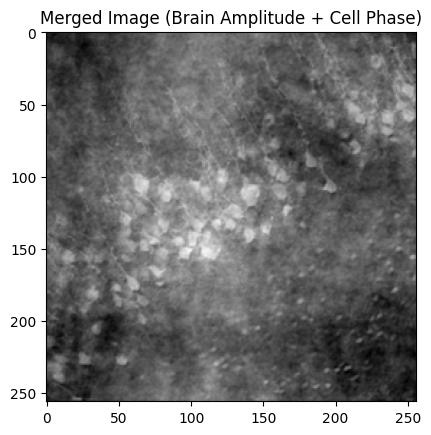

In [184]:
merged_ft_shift = to_complex_array(brain_amp_shift, cell_phase_shift)
merged_ft = np.fft.ifftshift(merged_ft_shift)
restored_merged = np.fft.ifft2(merged_ft)
restored_merged_real = restored_merged.real

plt.title("Merged Image (Brain Amplitude + Cell Phase)")
plt.imshow(restored_merged_real, cmap="gray")


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


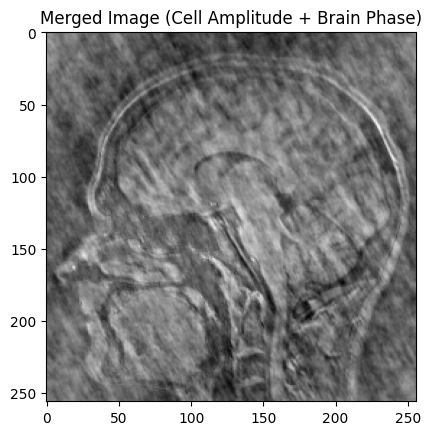

In [185]:
merged_second_ft_shift = to_complex_array(amplitude_shift, brain_phase_shift)
merged_second_ft = np.fft.ifftshift(merged_second_ft_shift)
restored_second_merged = np.fft.ifft2(merged_second_ft)
restored_second_merged_real = restored_second_merged.real

plt.title("Merged Image (Cell Amplitude + Brain Phase)")
plt.imshow(restored_second_merged_real, cmap="gray")

Wenn man Phase + fremde Amplitude kombiniert, dann:
Sieht fast wie das Original der Phase aus.
Man erkennt Konturen, Formen, Objekte.
Wenn man Amplitude + fremde Phase kombiniert:
Ergebnis wirkt wie starkes Rauschen bzw das andere "fremde bild" mit seiner phase, kaum Struktur erkennbar vom originales amplituden bild.

---


**[Task 3 (a).]()** Create a lowpass filter mask.


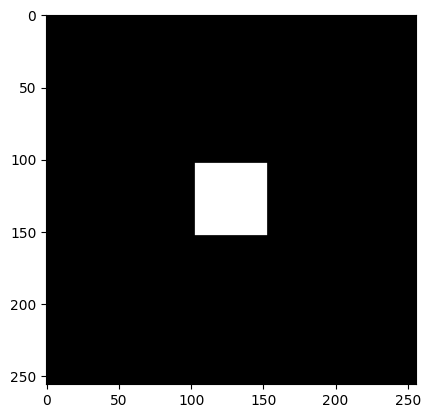

In [186]:
filter_window_size = 50
H, W = 256, 256
mask_lp = np.zeros((H, W))

center_y, center_x = H //2, W //2
half = filter_window_size // 2
mask_lp[center_y - half:center_y + half, center_x - half:center_x + half] = 1

plt.imshow(mask_lp, cmap='gray')

**[Task 3 (b).]()** Create a highpass filter maks.


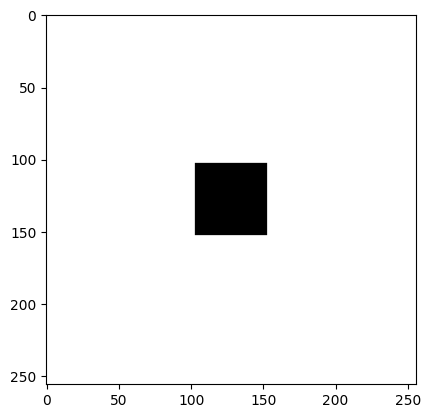

In [187]:
mask_hp = 1 - mask_lp
plt.imshow(mask_hp, cmap='gray')

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


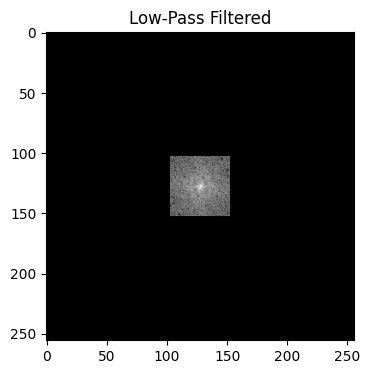

In [188]:
amp_lp = brain_amp_shift* mask_lp
amp_hp = brain_amp_shift * mask_hp


plt.figure(figsize=(12,4))

plt.title("Low-Pass Filtered")
plt.imshow(np.log(amp_lp + 1), cmap='gray')

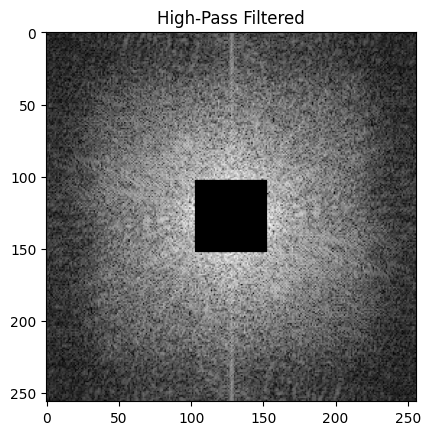

In [189]:
plt.title("High-Pass Filtered")
plt.imshow(np.log(amp_hp + 1), cmap='gray')

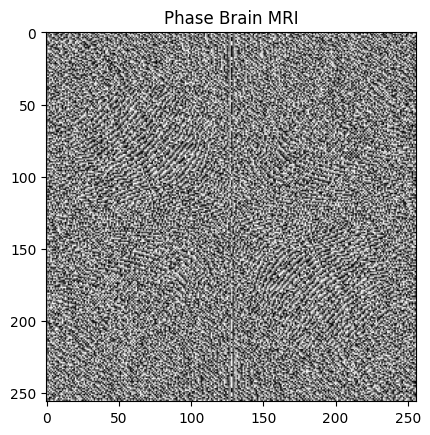

In [190]:
plt.title("Phase Brain MRI")
plt.imshow(brain_phase_shift, cmap='gray')

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


(-0.5, 255.5, 255.5, -0.5)

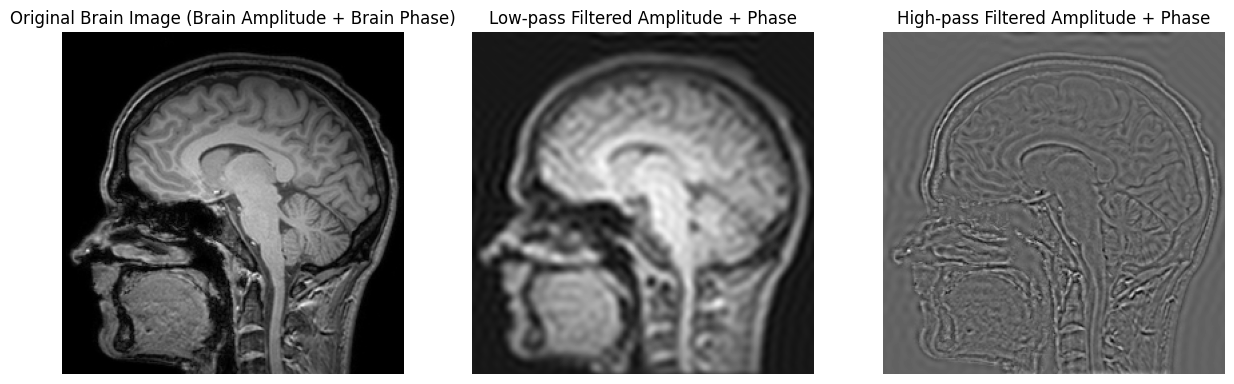

In [191]:
merged_lp = to_complex_array(amp_lp, brain_phase_shift)
merged_hp = to_complex_array(amp_hp, brain_phase_shift)

merged_lp_ft = np.fft.ifftshift(merged_lp)
merged_hp_ft = np.fft.ifftshift(merged_hp)

img_lp = np.fft.ifft2(merged_lp_ft).real
img_hp = np.fft.ifft2(merged_hp_ft).real

#original
merged_original_shift = to_complex_array(brain_amp_shift, brain_phase_shift)
merged_original = np.fft.ifftshift(merged_original_shift)
restored_merged = np.fft.ifft2(merged_original)
real_brain_restored = restored_merged.real




plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(real_brain_restored , cmap="gray")
plt.title("Original Brain Image (Brain Amplitude + Brain Phase)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_lp, cmap="gray")
plt.title("Low-pass Filtered Amplitude + Phase")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_hp, cmap="gray")
plt.title("High-pass Filtered Amplitude + Phase")
plt.axis("off")

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [192]:
dft = np.zeros(brain_resized.shape, dtype=complex)

def dft_2D(img):
    M, N = img.shape
    dft = np.zeros((M, N), dtype=complex)

    for u in range(M):  
        for v in range(N):
            sum_val = 0 + 0j
            for x in range (M):
                for y in range(N):
                    exponent = -2j * np.pi *((u*x)/M + (v*y)/N)
                    sum_val = sum_val + img[x, y] * np.exp(exponent)

            dft[u, v] = sum_val / (M * N)

    return dft

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [193]:
def idft_2D(dft):
    M, N = dft.shape
    img = np.zeros((M, N), dtype=complex)

    for x in range(M):
        for y in range(N):
            sum_val = 0 + 0j
            for u in range(M):
                for v in range(N):
                    exponent = 2j * np.pi * ((u*x)/M + (v*y)/N)
                    sum_val = sum_val + dft[u, v] * np.exp(exponent)

            img[x, y] = sum_val / (M * N)

    return img

    



Due to high computational costs, we need to resize the image.


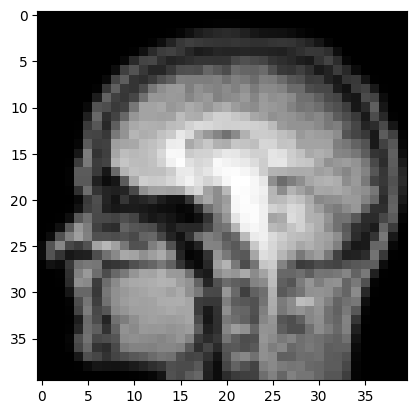

In [194]:
test_img = resize(brain_mri, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


(-0.5, 39.5, 39.5, -0.5)

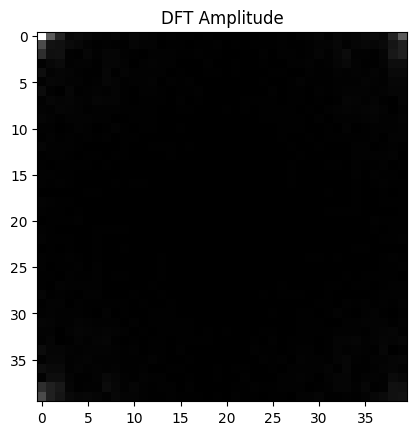

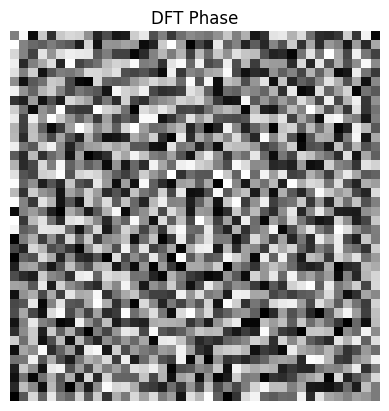

In [195]:
dft_test_img = dft_2D(test_img)


amplitude = np.log(np.abs(dft_test_img) + 1)
phase = np.angle(dft_test_img)


plt.figure()
plt.imshow(amplitude, cmap='gray')
plt.title("DFT Amplitude")


plt.figure()
plt.imshow(phase, cmap='gray')
plt.title("DFT Phase")
plt.axis('off')

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


Text(0.5, 1.0, 'Restored Image from IDFT')

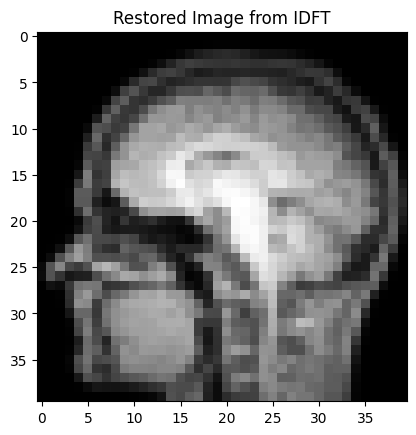

In [196]:
idft_restored = idft_2D(dft_test_img)

plt.figure()
plt.imshow(idft_restored.real, cmap="gray")
plt.title("Restored Image from IDFT")

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [197]:
dft_my = dft_2D(test_img)

dft_np = np.fft.fft2(test_img, norm = "forward")

are_equal = np.allclose(dft_my, dft_np)

print(are_equal)


True


**[Task 4 (f).]()** Round the arrays and compare them again.


In [198]:
difference = np.mean(np.abs(dft_my - dft_np))
print(difference)

dft_my_5 = np.round(dft_my, 5)
dft_np_5 = np.round(dft_np, 5)

difference_5 = np.mean(np.abs(dft_my_5 - dft_np_5))
print(difference_5)


max_decimals = 17

highest_identical = 0

for d in range(17 + 1):
    a = np.round(dft_my, d)
    b = np.round(dft_np, d)
    
    if np.array_equal(a, b):
        highest_identical = d
    else:
        break

print("größte anzhal gleicher Dezimalstellen:", highest_identical)

7.541097048883874e-17
0.0
größte anzhal gleicher Dezimalstellen: 12


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [199]:
my_time = %timeit dft_2D(test_img)
np_time = %timeit np.fft.fft2(test_img, norm="forward")

4.69 s ± 79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.5 μs ± 2.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
